In [2]:
import base64, tempfile, matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np
import os

In [3]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False

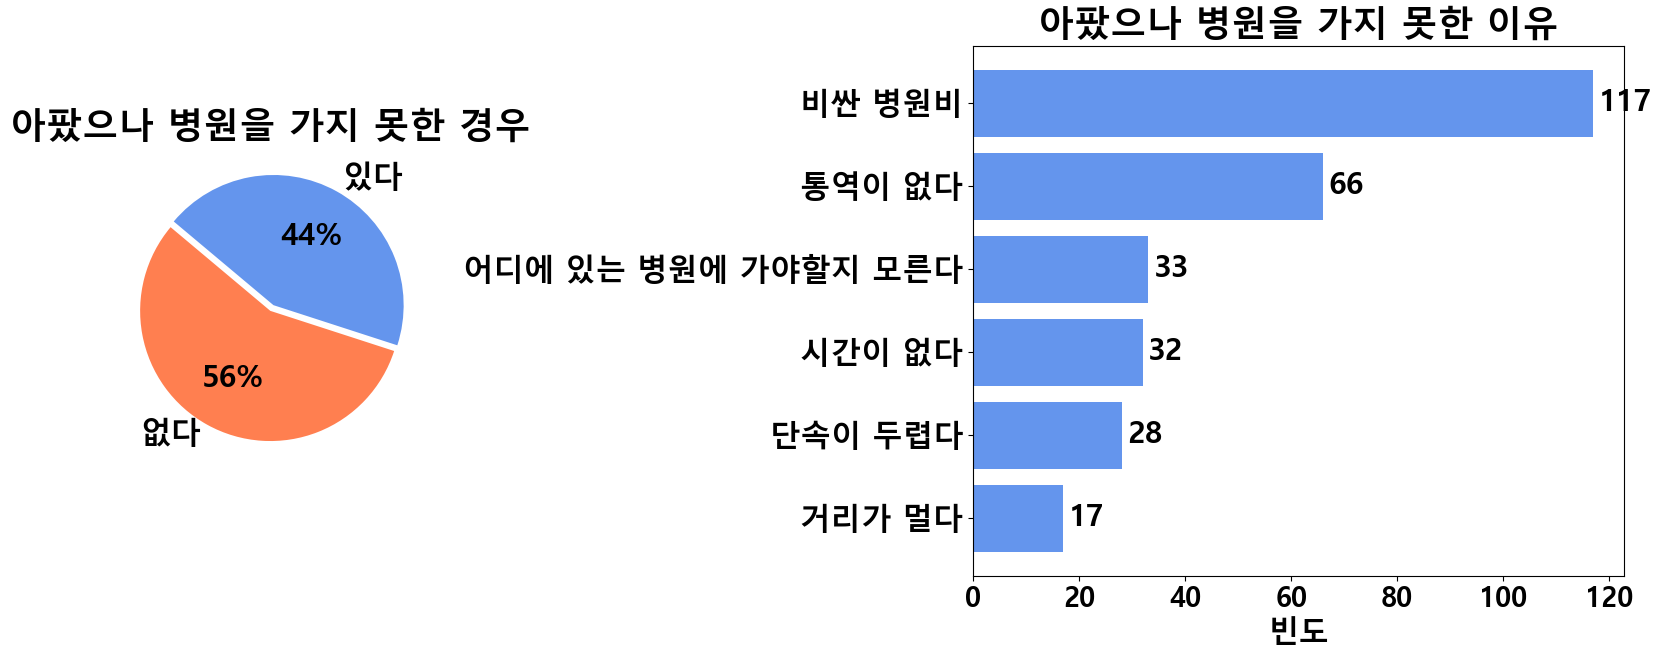

In [4]:
# 아팠으나 병원을 가지 못한 이유
from matplotlib import font_manager

# ===== 한글 폰트 설정 =====
# Mac
# plt.rcParams['font.family'] = 'AppleGothic'
# Windows
plt.rcParams['font.family'] = 'Malgun Gothic'
# Ubuntu (Nanum 설치 시)
# plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

# ===== 전역 Bold & 기본 폰트 크기 상향 =====
plt.rcParams['font.weight'] = 'bold'      # 전역 글꼴 Bold
plt.rcParams['axes.titleweight'] = 'bold' # 제목 Bold
plt.rcParams['axes.labelweight'] = 'bold' # 축 라벨 Bold
plt.rcParams['font.size'] = 20            # 전체 기본 글꼴 크기 ↑ (더 키움)

# ===== 데이터 =====
labels_pie = ["없다", "있다"]
sizes_pie = [55, 43]
colors_pie = ["#FF7F50", "#6495ED"]  # 코랄, 파랑
explode = (0, 0.05)

reasons = [
    "비싼 병원비",
    "통역이 없다",
    "어디에 있는 병원에 가야할지 모른다",
    "시간이 없다",
    "단속이 두렵다",
    "거리가 멀다",
]
counts = [117, 66, 33, 32, 28, 17]
colors_bar = ["#6495ED"] * len(reasons)

# ===== 그림 크기(표 크기) 확대 =====
fig, axes = plt.subplots(1, 2, figsize=(16, 7), gridspec_kw={"width_ratios": [1, 2]})

# ===== 파이 차트 =====
axes[0].pie(
    sizes_pie,
    explode=explode,
    labels=labels_pie,
    colors=colors_pie,
    autopct=lambda p: f"{p:.0f}%",
    startangle=140,
    textprops={"fontsize": 22, "fontweight": "bold"},  # 라벨/퍼센트 크게 & Bold
)
axes[0].set_title("아팠으나 병원을 가지 못한 경우", fontsize=26, fontweight="bold")

# ===== 수평 막대 차트 =====
y_pos = np.arange(len(reasons))
axes[1].barh(y_pos, counts, color=colors_bar)
axes[1].set_yticks(y_pos)
axes[1].set_yticklabels(reasons, fontsize=22, fontweight="bold")  # 이유 라벨 크게 & Bold
axes[1].invert_yaxis()
axes[1].set_xlabel("빈도", fontsize=22, fontweight="bold")
axes[1].set_title("아팠으나 병원을 가지 못한 이유", fontsize=26, fontweight="bold")

# x축 눈금 글씨도 Bold로
for tick in axes[1].get_xticklabels():
    tick.set_fontsize(20)
    tick.set_fontweight("bold")

# 막대 끝 값(숫자) 크게 & Bold
for i, v in enumerate(counts):
    axes[1].text(v + 1, i, str(v), va="center", fontsize=22, fontweight="bold")

plt.tight_layout()
# plt.savefig("hospital_reasons_bold.png", dpi=220)  # 필요하면 저장
plt.show()

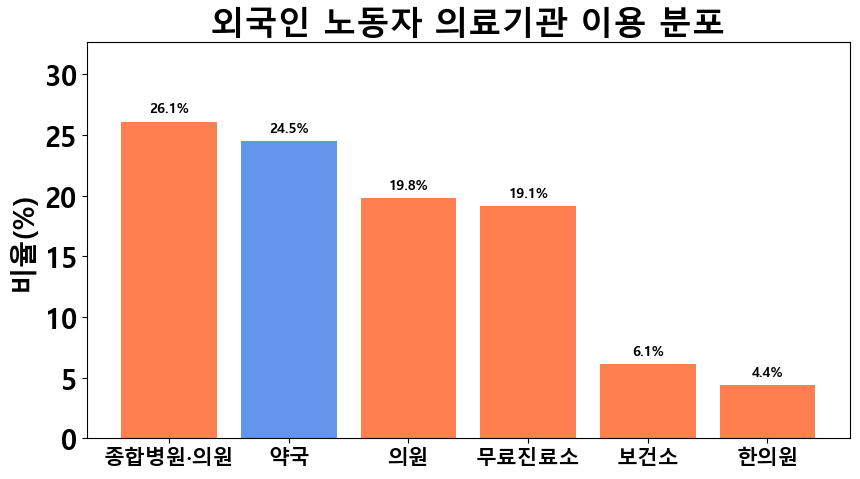

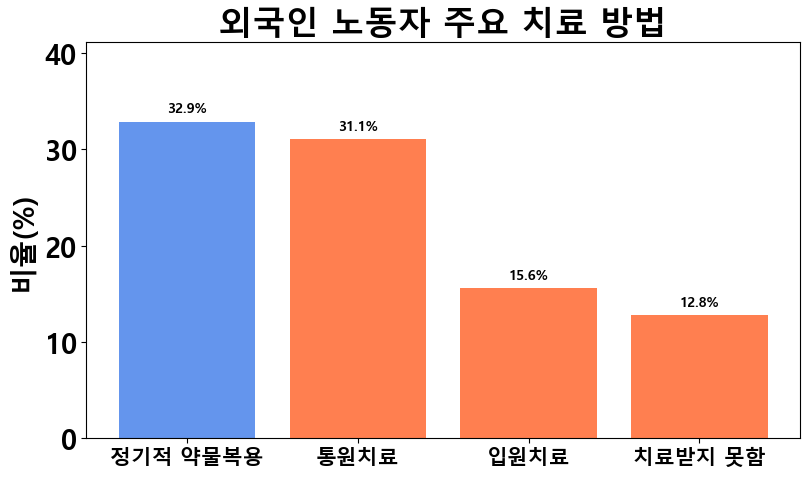

In [5]:
# 외국인 노동자 의료기관 이용 분포
# ===== 데이터 =====
inst_labels = ['종합병원·의원', '약국', '의원', '무료진료소', '보건소', '한의원']
inst_values = [26.1, 24.5, 19.8, 19.1, 6.1, 4.4]

treat_labels = ['정기적 약물복용', '통원치료', '입원치료', '치료받지 못함']
treat_values = [32.9, 31.1, 15.6, 12.8]

PRIMARY = '#6495ED'   # 약국 방문 / 정기적 약물복용
SECONDARY = '#FF7F50' # 나머지

inst_colors = [PRIMARY if lab == '약국' else SECONDARY for lab in inst_labels]
treat_colors = [PRIMARY if lab == '정기적 약물복용' else SECONDARY for lab in treat_labels]

def add_value_labels(bars, values):
    top = max(values)
    for b, v in zip(bars, values):
        plt.text(b.get_x() + b.get_width()/2, b.get_height() + top*0.02,
                 f'{v:.1f}%', ha='center', va='bottom', fontsize=10)


XTICK_FONTSIZE = 15   # <-- x축 글자 크기

# ===== 그래프 1 =====
plt.figure(figsize=(9, 5.2))
bars1 = plt.bar(inst_labels, inst_values, color=inst_colors)
add_value_labels(bars1, inst_values)
plt.ylabel('비율(%)')
plt.title('외국인 노동자 의료기관 이용 분포')
plt.ylim(0, max(inst_values)*1.25)
plt.xticks(fontsize=XTICK_FONTSIZE)  # 크기 조절
plt.tight_layout()
plt.show()

# ===== 그래프 2 =====
plt.figure(figsize=(8.5, 5.2))
bars2 = plt.bar(treat_labels, treat_values, color=treat_colors)
add_value_labels(bars2, treat_values)
plt.ylabel('비율(%)')
plt.title('외국인 노동자 주요 치료 방법')
plt.ylim(0, max(treat_values)*1.25)
plt.xticks(fontsize=XTICK_FONTSIZE)  # 크기 조절
plt.tight_layout()
plt.show()

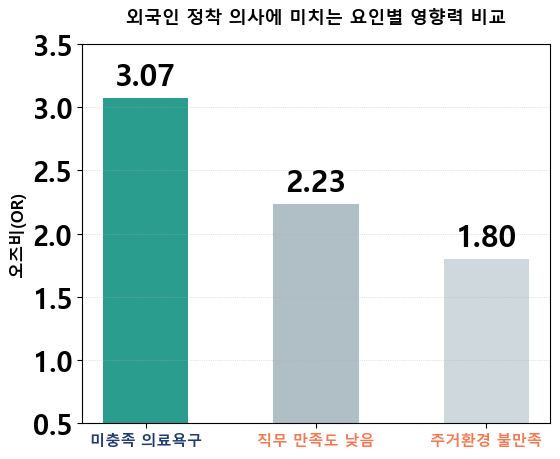

In [ ]:
# 외국인 정착 의사에 미치는 요인별 영향력

labels = ['미충족 의료욕구', '직무 만족도 낮음', '주거환경 불만족']
values = [3.07, 2.23, 1.80]
colors = ['#2a9d8f', '#b0bec5', '#cfd8dc']  # 막대 색상은 기존 유지

x_pos = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.bar(x_pos, values, color=colors, width=0.5)

# --- 막대 위 수치 표시: 글자 크기 2배(11 -> 22) ---
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 0.05, f'{h:.2f}',
            ha='center', va='bottom', fontsize=22)

# --- x축 라벨 색상 개별 지정 ---
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize=11)

navy = '#203A73'   # 남색계열
gray = "#F77750"   # 주황색계열
for ticklabel in ax.get_xticklabels():
    if ticklabel.get_text() == '미충족 의료욕구':
        ticklabel.set_color(navy)
    else:
        ticklabel.set_color(gray)

# 축/제목 및 기타
ax.set_ylim(0.5, 3.5)
ax.set_yticks(np.arange(0.5, 3.6, 0.5))
ax.set_ylabel('오즈비(OR)', fontsize=12)
ax.set_title('외국인 정착 의사에 미치는 요인별 영향력 비교', fontsize=13, pad=15)
ax.grid(axis='y', linestyle=':', linewidth=0.5, alpha=0.7)

fig.tight_layout()
plt.show()